### In this notebook, we show how to retrieve the Kasthuri graph

- Our graph is derived from RAMON Metadata, and so may differ slightly from that of the graph in the paper.  
- For a small percentage (2%) of the connections, we reassigned either neuron or synapse labels based on geometries 
 and paint information.
- This is slightly different than the graph shown in claim 7 - TODO.  Will update accordingly 

In [1]:
import numpy as np
import ndio.remote.neurodata as neurodata
import ndio.ramon as ramon
import time
import ndio
import networkx as nx
start = time.time()

token_synapse = 'kasthuri2015_ramon_v4'
channel_synapse = 'synapses'

token_neurons = 'kasthuri2015_ramon_v4'
channel_neurons = 'neurons'

res = 3

In [2]:
# Find all synapses

nd = neurodata()

id_synapse = nd.get_ramon_ids(token_synapse, channel_synapse, ramon_type=ramon.RAMONSynapse)
print len(id_synapse)

1700


In [3]:
# An example synapse
s = nd.get_ramon(token_synapse, channel_synapse, id_synapse[3])
print s.segments[0]
vars(s)


[1822, 2]


{'author': u'unspecified',
 'confidence': 1.0,
 'cutout': None,
 'id': u'4',
 'kvpairs': {u'axonSynapseType': u'en-passant',
  u'centroidx_um': u'39.6',
  u'centroidy_um': u'55.13',
  u'centroidz_um': u'31.47',
  u'multiSynapseBouton': u'yes',
  u'postsynaptic': u'1822',
  u'presynaptic': u'3832',
  u'psdSize': u'1393',
  u'synapseLocation': u'spine',
  u'vesicleCount': u'281'},
 'resolution': 0,
 'segments': [[1822, 2], [3832, 1]],
 'status': 0,
 'synapse_type': 0,
 'voxels': None,
 'weight': 0.0,
 'xyz_offset': (0, 0, 0)}

In [4]:
def make_graph(local=True, directed=True):

    # Instantiate graph
    if is_directed == False:  # undirected case
        G = nx.Graph()
    else:
        G = nx.DiGraph()        

        
    # if local, then cache all synapse and segment metadata - faster by 10x(!), but limited in scalability





In [5]:
# for each synapse 
c = 0 
for x in id_synapse:
    c += 1
    print str(c).zfill(4),
    s = nd.get_ramon(token_synapse,channel_synapse, x)
    
    # for each segment
    segments = [seg[0] for seg in s.segments]
    direction = [seg[1] for seg in s.segments]
    # 1: axon/pre, 2: dendrite/post (see enumerated types)
    
    #print direction
    if len(segments) != 2:
        raise('multiway synapses not implemented!')

    s1 = nd.get_ramon(token_neurons,channel_neurons,segments[0])
    n1 = s1.neuron
    s2 = nd.get_ramon(token_neurons,channel_neurons,segments[1])
    n2 = s2.neuron
                    
    if is_directed is False or (direction[0] == 1 and direction[1] == 2):  
        if G.has_edge(n1, n2): # edge already exists, increase weight
            G[n1][n2]['weight'] += 1
        else:
            # new edge. add with weight=1
            G.add_edge(n1, n2, weight=1)

    elif direction[0] == 2 and direction[1] == 1:
        if G.has_edge(n2, n1): # edge already exists, increase weight
            G[n2][n1]['weight'] += 1
        else:
            # new edge. add with weight=1
            G.add_edge(n2, n1, weight=1)
    else: 
        print('1 pre and 1 post synaptic partner are required for directed graph estimation.')
        raise

0001 0002 0003 0004 0005 0006 0007 0008 0009 0010 0011 0012 0013 0014 0015 0016 0017 0018 0019 0020 0021 0022 0023 0024 0025 0026 0027 0028 0029 0030 0031 0032 0033 0034 0035 0036 0037 0038 0039 0040 0041 0042 0043 0044 0045 0046 0047 0048 0049 0050 0051 0052 0053 0054 0055 0056 0057 0058 0059 0060 0061 0062 0063 0064 0065 0066 0067 0068 0069 0070 0071 0072 0073 0074 0075 0076 0077 0078 0079 0080 0081 0082 0083 0084 0085 0086 0087 0088 0089 0090 0091 0092 0093 0094 0095 0096 0097 0098 0099 0100 0101 0102 0103 0104 0105 0106 0107 0108 0109 0110 0111 0112 0113 0114 0115 0116 0117 0118 0119 0120 0121 0122 0123 0124 0125 0126 0127 0128 0129 0130 0131 0132 0133 0134 0135 0136 0137 0138 0139 0140 0141 0142 0143 0144 0145 0146 0147 0148 0149 0150 0151 0152 0153 0154 0155 0156 0157 0158 0159 0160 0161 0162 0163 0164 0165 0166 0167 0168 0169 0170 0171 0172 0173 0174 0175 0176 0177 0178 0179 0180 0181 0182 0183 0184 0185 0186 0187 0188 0189 0190 0191 0192 0193 0194 0195 0196 0197 0198 0199 0200 

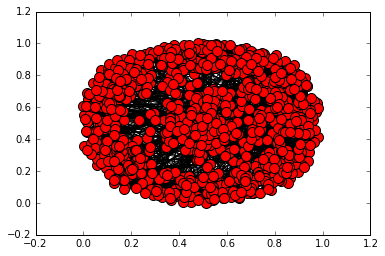

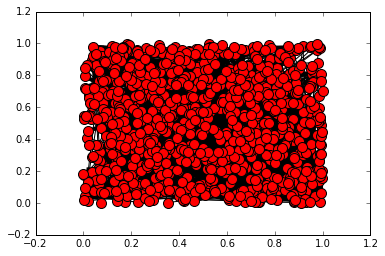

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

nx.draw_networkx(G, width=1, node_size = 100, with_labels=False, pos=nx.fruchterman_reingold_layout(G))#random_layout(G))# fruchterman_reingold_layout(G))
plt.show()
nx.draw_networkx(G, width=1, node_size = 100, with_labels=False, pos=nx.random_layout(G))#random_layout(G))
plt.show()

In [7]:
# Save graphml graph

nx.write_graphml(G, 'kasthuri2015_ramon_v4.graphml')

In [8]:
print '{} seconds elapsed.'.format(time.time()-start)

922.137179136 seconds elapsed.
